# Conceptos básicos: regresión logística y descenso del gradiente en Python

## CUNEF : MDS-1 - Machine learning (2020/2021) 

## Daniel Corral Ruiz

El método del gradiente descendiente es muy usado para entrenar redes neuronales y también en aprendizaje profundo (deep learning). En particular, nos interesa utilizar el gradiente descendiente para estimar los parámetros que minimizan la función de coste.

# Carga de librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline
from PIL import Image
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

# Trabajamos con el dataset

In [2]:
data = pd.read_csv("..\\data\\4_1_data.csv")
data.head()

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
puntuacion = data[['score-1', 'score-2']].values # creamos un objeto llamado "puntuación". Este objeto muestra la primera y 
# segunda columna de nuestro dataset con las puntuaciiones obtenidas.
resultados = data['label'].values # creamos un segundo objeto llamado "resultado". Este objeto muestra si ha aprobado o no,
# con un valor de 1 si ha aprobado y un 0 en el caso contrario.

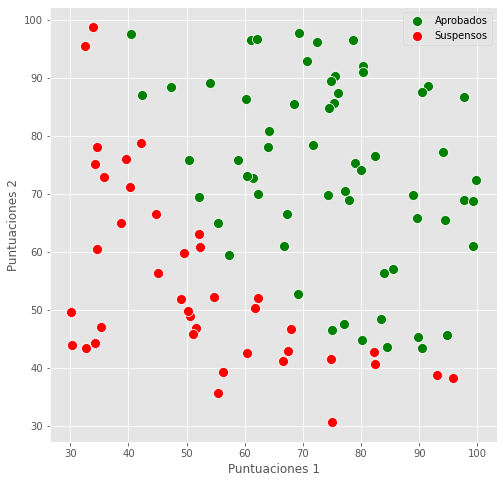

In [4]:
aprobado = (resultados == 1).reshape(100, 1) # en el caso que sea el resultado 1 es aprobado. FILTROS
suspenso = (resultados == 0).reshape(100, 1) # en el caso que sea el resultado 0 es suspenso. FILTROS

# Creamos un gráfico con las puntuaciones obtenidas, así como si ha superado la prueba o no (se muetra en color rojo cuando NO
# la ha superado y en verde cuando SI).
notas = sns.scatterplot(x = puntuacion[aprobado[:, 0], 0], # los puntos en el eje "x" (score-1) cuando sean APROBADOS gracias...
                                                           # al filtro.
                     y = puntuacion[aprobado[:, 0], 1],    # los puntos en el eje "y" (score-2) cuando sean APROBADOS gracias...
                                                           # al filtro.
                     marker = "o",                         # forma del punto.                    
                     color = "green",                      # color verde para los aprobados.
                     s = 100)                              # tamaño de la forma del punto.
sns.scatterplot(x = puntuacion[suspenso[:, 0], 0],         # los puntos en el eje "x" (score-1) cuando sean SUSPENSOS gracias...
                                                           # al filtro.
                y = puntuacion[suspenso[:, 0], 1],         # los puntos en el eje "y" (score-2) cuando sean SUSPENSOS gracias...
                                                           # al filtro.
                marker = "o",                              # forma del punto.
                color = "red",                             # color verde para los aprobados.
                s = 100)                                   # tamaño de la forma del punto.

notas.set(xlabel="Puntuaciones 1", ylabel="Puntuaciones 2") # cambiamos nombre a los ejes "x" e "y".
notas.legend(["Aprobados", "Suspensos"])                    # incluimos leyenda al gráfico.
plt.show();                                                 # mostramos.

# Definimos función Sigmoide

Muchos procesos naturales y curvas de aprendizaje de sistemas complejos muestran una progresión temporal desde unos niveles bajos al inicio, hasta acercarse a un clímax transcurrido un cierto tiempo; la transición se produce en una región caracterizada por una fuerte aceleración intermedia. La función sigmoide permite describir esta evolución. Su gráfica tiene una típica forma de "S". A menudo la función sigmoide se refiere al caso particular de la función logística.

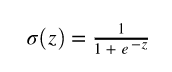

In [5]:
i = Image.open('..\docs\Sigmoid.PNG','r')
i

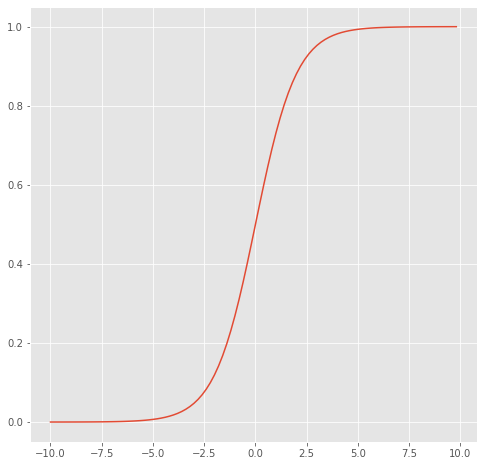

In [6]:
def sigmoide(x):    
    return 1/ (1 + np.exp(-x))            # definimos la función sigmoide.
x = np.arange(-10., 10., 0.2)             # creamos rango de números para su representación.
sig = sigmoide(x)
plt.plot(x,sig)                           # representamos.
plt.show()

# Función de coste

El error global es la suma de todos los errores teniendo en cuenta todos los errores.El objetivo de la regresión logística es minimizar la función de costo: 




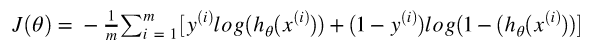

In [7]:
costo = Image.open('..\docs\Cost.PNG','r')
costo

Mientras que la función de gradiente:

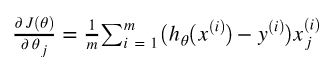

In [8]:
gradiente = Image.open('..\docs\Gradient.PNG','r')
gradiente

In [9]:
def coste (theta, x, y):                                          # definimos función de coste
    m = len(y)                                                    # m es logitud de y
    y_pred = sigmoide(np.dot(x , theta))                          # producto de matrices aplicamos funcion sigmoide
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred)) # función de error (lo que hay dentro del corchete)
    cost = -1 / m * sum(error)                                    # añadimos en el denominador el sumatorio del error
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))        # gradiente
    return cost[0] , gradient

El gradiente descendiente funciona mucho mejor cuando los datos tienen una escala similar. Esto se debe a la forma geométrica de la función de coste. Cuando todas las dimensiones tiene una escala similar, podemos esperar la forma de cuenco multidimensional. Sin embargo, si distintas dimensiones tienen una escala diferente, la forma geométrica será muy diferente. Esto hace que el gradiente descendiente tarde mucho en converger.

In [10]:
mean_scores = np.mean(puntuacion, axis=0) # media de las puntuaciones
std_scores = np.std(puntuacion, axis=0)   # desviación de las puntuaciones
puntuaciones = (puntuacion - mean_scores) / std_scores # Estandarizamos

rows = puntuaciones.shape[0] # filas de puntuaciones
cols = puntuaciones.shape[1] # columnas de puntuaciones

X = np.append(np.ones((rows, 1)), puntuaciones, axis=1) # incluimos el intercepto, vector de 1.
y = resultados.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))       # creamos array de 0
cost, gradient = coste(theta_init, X, y)

print("Coste al inicializar:", cost)
print("Gradiente al inicializar:", gradient)

Coste al inicializar: 0.693147180559946
Gradiente al inicializar: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


# Gradiente y coste

Minimizar la función de costo actualizando la ecuación y repetirla hasta la convergencia.

In [11]:
def gradiente(x, y, theta, alpha, iterations): # definimos la funcion del gradiente
    costs = []
    for i in range(iterations):
        cost, gradient = coste(theta, x, y)
        theta -= (alpha * gradient) 
        costs.append(cost)
    return theta, costs

# Valores de aprendizaje e interacción

Podemos variar el valor del ratio de aprendizaje, valores entre 0 y 1. El ratio de aprendizaje (learning rate en inglés) es necesario para asegurarnos que no vamos dando pasos grandes durante el descenso. Si el ratio de aprendizaje es demasiado grande, los cambios en la gráfica serán también muy grandes y será difícil encontrar los coeficientes que minimicen la función de coste. Por otra parte, si el ratio de aprendizaje es demasiado pequeño, el gradiente descendiente tardará mucho en encontrar la solución adecuada.  
En nuestro caso utilizamos un nivel de alpha de 1 y un total de 200 interacciones.

In [12]:
# theta, costs = gradiente(X, y, theta_init, 1, 50)     # Ratio de aprendizaje de 1 y 50 interacciones

In [13]:
# theta, costs = gradiente(X, y, theta_init, 1, 100)    # Ratio de aprendizaje de 1 y 100 interacciones

In [14]:
theta, costs = gradiente(X, y, theta_init, 1, 200)      # Ratio de aprendizaje de 1 y 200 interacciones

In [15]:
# theta, costs = gradiente(X, y, theta_init, 0.5, 300)  # Ratio de aprendizaje de 0.5 y 300 interacciones

In [16]:
# theta, costs = gradiente(X, y, theta_init, 0.35, 500) # Ratio de aprendizaje de 0.35 y 500 interacciones

In [17]:
print("Theta valor despues de descender:", theta)
print("Resultado del coste:", costs[-1])

Theta valor despues de descender: [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
Resultado del coste: 0.20489382036036602


# Representación gráfica

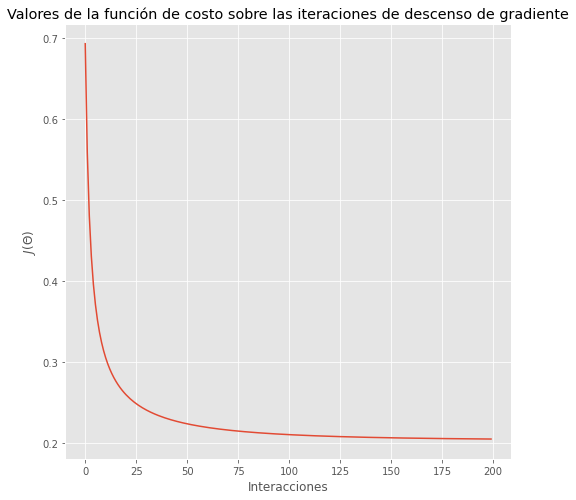

In [18]:
plt.plot(costs)
plt.xlabel("Interacciones")
plt.ylabel("$J(\Theta)$")
plt.title("Valores de la función de costo sobre las iteraciones de descenso de gradiente");

En este caso podemos ver un total de 200 interacciones con un ratio de aprendizaje de 1. Podemos observar en las primeras interacciones la bajada del coste de forma progresiva, es en el rango de interacciones 125 - 150 cuando el valor del coste comienza a descender lentamente situandose en torno al valor 0.204893.

# Referencias

- https://medium.com/metadatos/todo-lo-que-necesitas-saber-sobre-el-descenso-del-gradiente-aplicado-a-redes-neuronales-19bdbb706a78

- https://www.analyticslane.com/2018/12/21/implementacion-del-metodo-descenso-del-gradiente-en-python/

- http://www.cs.us.es/~fsancho/?e=165